In [1]:
import pandas as pd
import numpy as np

In [2]:
toyota_prices = pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
x = toyota_prices.drop("Price", axis=1)
y = toyota_prices["Price"]

In [4]:
x.head(5)

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age_08_04  1436 non-null   int64 
 1   KM         1436 non-null   int64 
 2   Fuel_Type  1436 non-null   object
 3   HP         1436 non-null   int64 
 4   Automatic  1436 non-null   int64 
 5   cc         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [6]:
x.describe()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
x.isnull().sum()

Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
for col in x.select_dtypes(include='int'):
    unique_count = x[col].nunique()
    total_count = len(x[col])
    if unique_count / total_count < 0.05:
        print(f"{col} is likely categorical ({unique_count} unique values out of {total_count})")
    else:
        print(f"{col} is likely NOT categorical ({unique_count} unique values out of {total_count})")

Age_08_04 is likely NOT categorical (77 unique values out of 1436)
KM is likely NOT categorical (1263 unique values out of 1436)
HP is likely categorical (12 unique values out of 1436)
Automatic is likely categorical (2 unique values out of 1436)
cc is likely categorical (13 unique values out of 1436)
Doors is likely categorical (4 unique values out of 1436)
Cylinders is likely categorical (1 unique values out of 1436)
Gears is likely categorical (4 unique values out of 1436)
Weight is likely categorical (59 unique values out of 1436)


In [9]:
x = x.drop("Cylinders", axis=1)

In [10]:
categorical_cols = ['HP', 'Automatic', 'cc', 'Doors', 'Gears']
for col in categorical_cols:
    x[col] = x[col].astype('category')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = x.select_dtypes(include = "number")

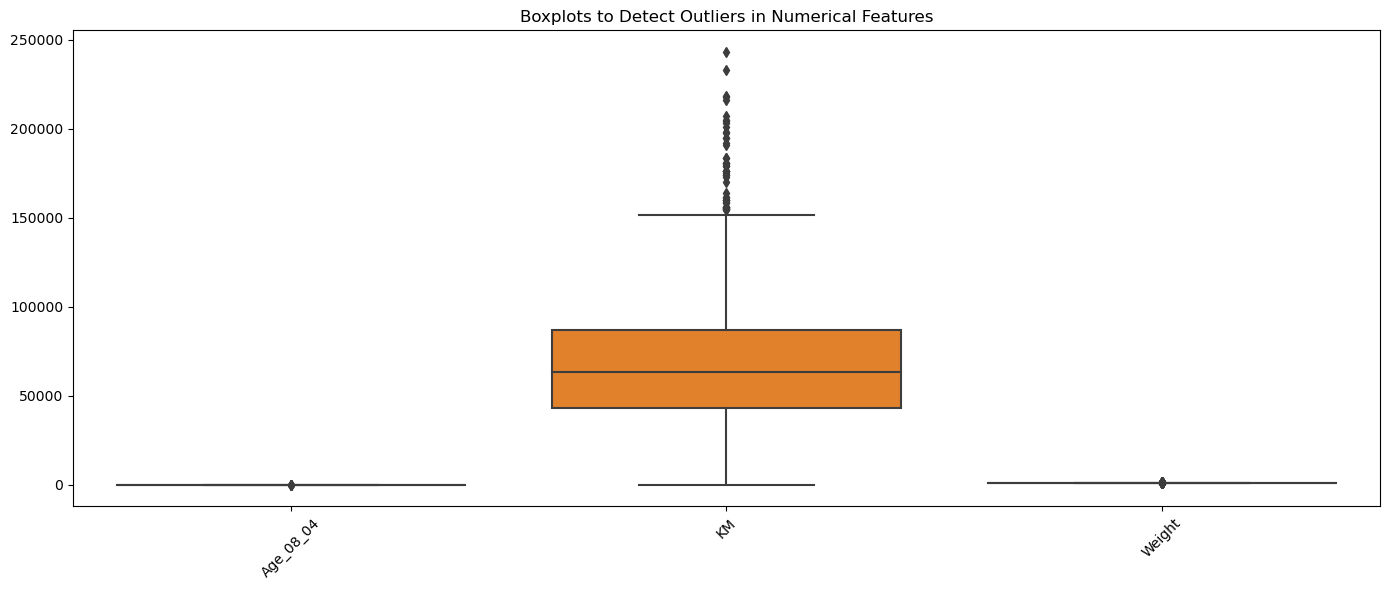

In [12]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=45)
plt.title('Boxplots to Detect Outliers in Numerical Features')
plt.tight_layout()
plt.show()

In [13]:
numeric_cols = x.select_dtypes(include='number')

# Function to detect outliers
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count values outside bounds
        outlier_count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
        outliers[col] = outlier_count
    return pd.Series(outliers)

# Detect and print outliers
outliers_found = detect_outliers_iqr(numeric_cols)
print("Number of outliers in each numerical column:\n")
print(outliers_found)

Number of outliers in each numerical column:

Age_08_04     7
KM           49
Weight       66
dtype: int64


In [14]:
def fill_outliers_with_central_tendency(df, skew_threshold=0.5):
    df_filled = df.copy()
    for col in df_filled.select_dtypes(include='number').columns:
        Q1 = df_filled[col].quantile(0.25)
        Q3 = df_filled[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = (df_filled[col] < lower_bound) | (df_filled[col] > upper_bound)

        # Decide whether to use mean or median based on skewness
        if df_filled[col].skew() > skew_threshold:
            replacement = df_filled[col].median()
        else:
            replacement = df_filled[col].mean()

        # Replace outliers
        df_filled.loc[outliers, col] = replacement

    return df_filled



x_cleaned = fill_outliers_with_central_tendency(x)

In [15]:
numeric_cols = x_cleaned.select_dtypes(include='number')

# Function to detect outliers
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count values outside bounds
        outlier_count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
        outliers[col] = outlier_count
    return pd.Series(outliers)

# Detect and print outliers
outliers_found = detect_outliers_iqr(numeric_cols)
print("Number of outliers in each numerical column:\n")
print(outliers_found)

Number of outliers in each numerical column:

Age_08_04     0
KM           16
Weight        7
dtype: int64


In [16]:
x_encoded = pd.get_dummies(x, drop_first=True)

In [17]:
x_encoded.head(5)

,Age_08_04,KM,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,HP_71,HP_72,HP_73,HP_86,HP_90,...,cc_1975,cc_1995,cc_2000,cc_16000,Doors_3,Doors_4,Doors_5,Gears_4,Gears_5,Gears_6
0,23,46986,1165,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,23,72937,1165,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,24,41711,1165,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,26,48000,1165,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,30,38500,1170,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


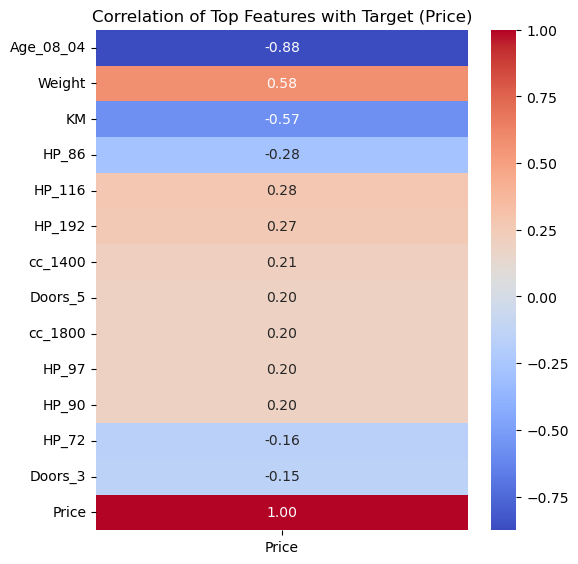

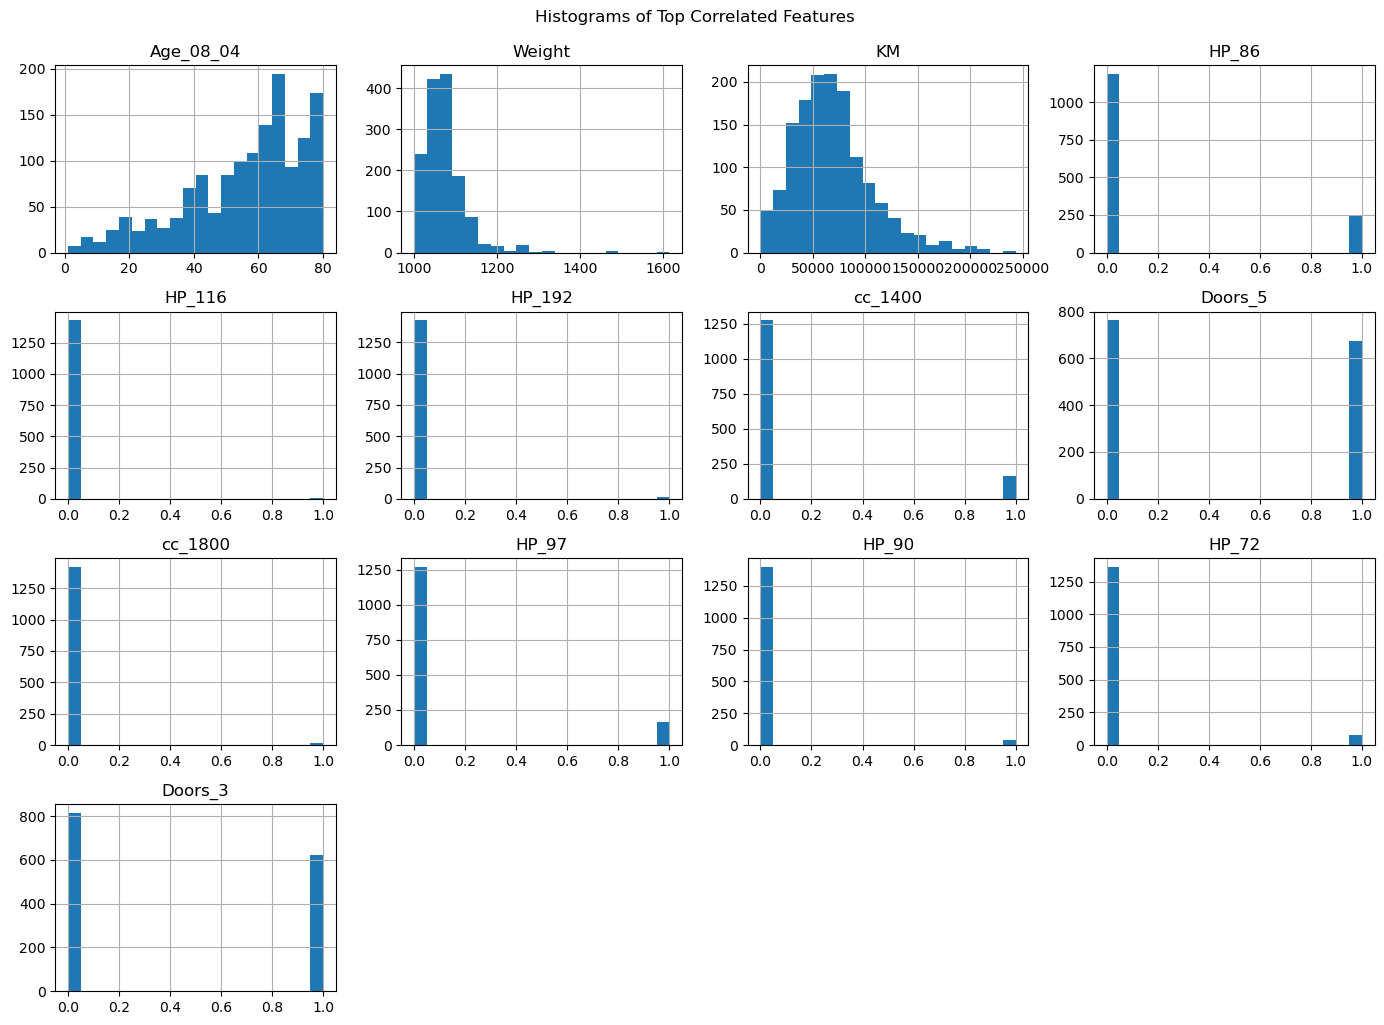

In [18]:
# Step 1: Create a temporary DataFrame with target
X_temp = x_encoded.copy()
X_temp['Price'] = y  # Temporarily add target for correlation

# Step 2: Calculate correlation with target
correlation_with_price = X_temp.corr()['Price'].drop('Price').sort_values(key=abs, ascending=False)

# Step 3: Select features with absolute correlation > 0.1
top_features = correlation_with_price[abs(correlation_with_price) > 0.1].index.tolist()

# Step 4: Create a new DataFrame with top features only
X_top = x_encoded[top_features]

# Step 5: Correlation heatmap with Price
plt.figure(figsize=(6, len(top_features) * 0.5))
sns.heatmap(X_temp[top_features + ['Price']].corr()[['Price']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Top Features with Target (Price)")
plt.show()

# Step 6: Histograms of selected features
X_top.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.suptitle("Histograms of Top Correlated Features", y=1.02)
plt.show()

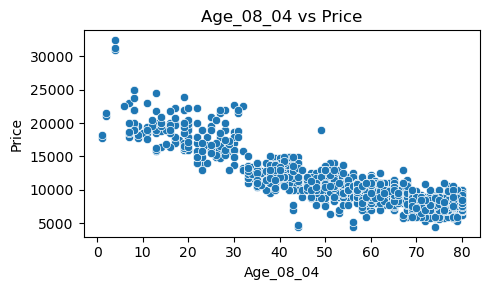

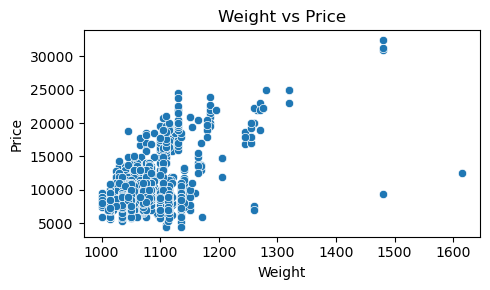

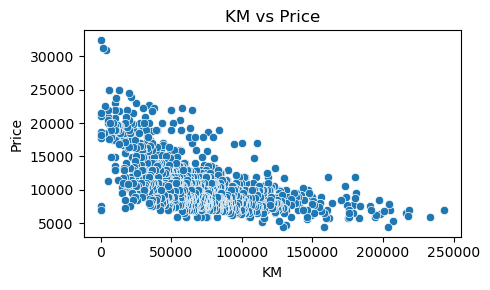

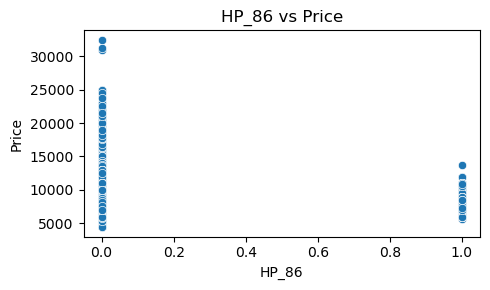

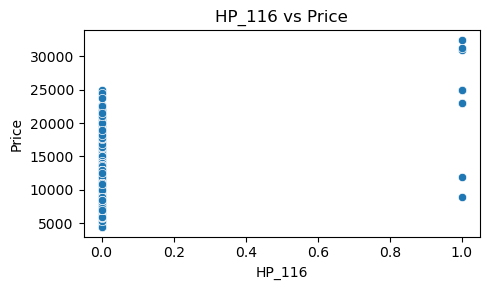

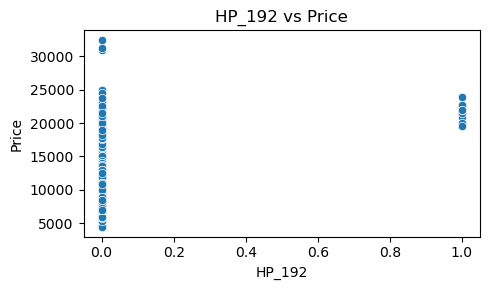

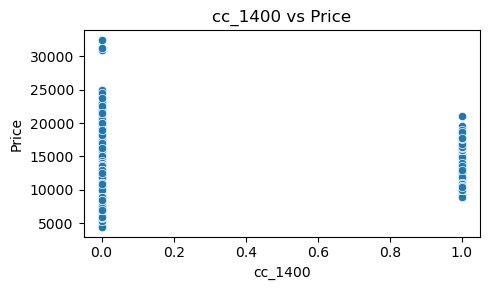

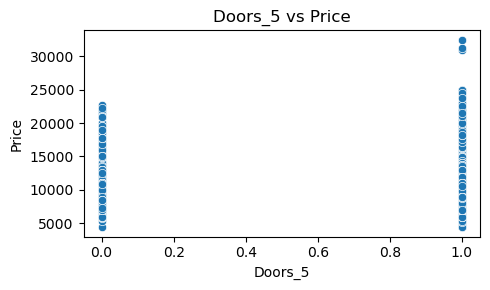

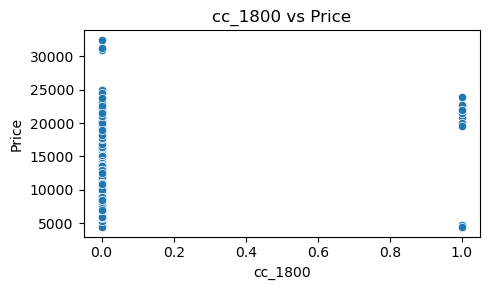

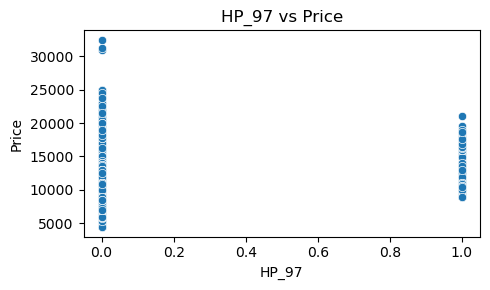

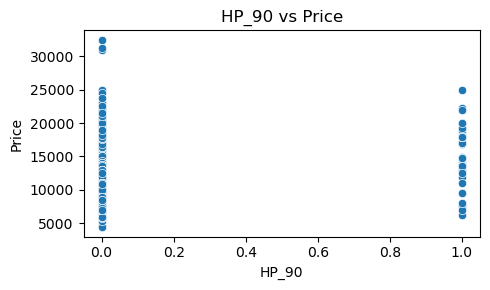

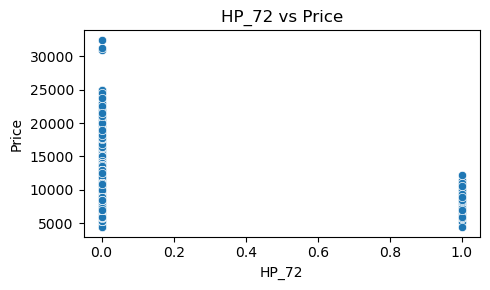

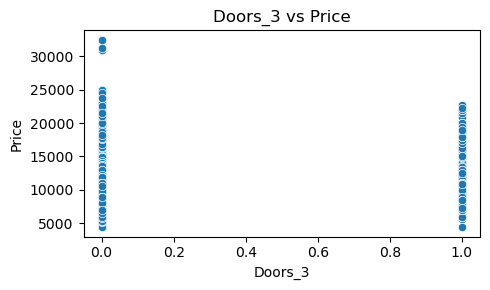

In [19]:
for col in top_features:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=x_encoded[col], y=y)
    plt.title(f"{col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

In [20]:
selected_features = [
    'Age_08_04', 'KM', 'Weight',
    'HP_116', 'HP_192',
    'cc_1400', 'Doors_5'
]

# Set your final X for modeling
x = x_encoded[selected_features]

In [21]:
x.head(5)

,Age_08_04,KM,Weight,HP_116,HP_192,cc_1400,Doors_5
0,23,46986,1165,0,0,0,0
1,23,72937,1165,0,0,0,0
2,24,41711,1165,0,0,0,0
3,26,48000,1165,0,0,0,0
4,30,38500,1170,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

# X = your selected features, y = target (Price)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.linear_model import LinearRegression


# === Model 1: All selected features ===
model1 = LinearRegression()
model1.fit(x_train[selected_features], y_train)
y_pred1 = model1.predict(x_test[selected_features])

# === Model 2: Remove 'Doors_5' ===
reduced_features = [f for f in selected_features if f != 'Doors_5']
model2 = LinearRegression()
model2.fit(x_train[reduced_features], y_train)
y_pred2 = model2.predict(x_test[reduced_features])

# === Model 3: Top 3 features only ===
top3_features = ['Age_08_04', 'Weight', 'KM']
model3 = LinearRegression()
model3.fit(x_train[top3_features], y_train)
y_pred3 = model3.predict(x_test[top3_features])


In [24]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge = Ridge(alpha=0.1)
# Train the model
ridge.fit(x_train, y_train)
# Predict test set results
y_pred4 = ridge.predict(x_test)

In [25]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso = Lasso(alpha=0.1)
# Train the model
lasso.fit(x_train, y_train)
# Predict test set results
y_pred5 = lasso.predict(x_test)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("R² Score :", round(r2_score(y_true, y_pred), 4))
    print("MSE      :", round(mean_squared_error(y_true, y_pred), 2))
    print("MAE      :", round(mean_absolute_error(y_true, y_pred), 2))

# Evaluate each model
evaluate_model("Model 1: All Features", y_test, y_pred1)
evaluate_model("Model 2: Excluding 'Doors_5'", y_test, y_pred2)
evaluate_model("Model 3: Top 3 Features", y_test, y_pred3)
evaluate_model("Model 4: Ridge regression", y_test, y_pred4)
evaluate_model("Model 5: Lasso regression", y_test, y_pred5)


=== Model 1: All Features ===
R² Score : 0.869
MSE      : 1748133.57
MAE      : 954.81

=== Model 2: Excluding 'Doors_5' ===
R² Score : 0.869
MSE      : 1747942.4
MAE      : 951.45

=== Model 3: Top 3 Features ===
R² Score : 0.8325
MSE      : 2234953.06
MAE      : 1020.59

=== Model 4: Ridge regression ===
R² Score : 0.8687
MSE      : 1751569.75
MAE      : 955.67

=== Model 5: Lasso regression ===
R² Score : 0.8689
MSE      : 1749494.21
MAE      : 955.09


## Findings

We developed three multiple linear regression (MLR) models using different combinations of features to predict the price of Toyota Corolla cars. Model 1, which included all selected features, achieved the highest performance with an R² score of 0.869, an MSE of 1,748,134, and an MAE of 954.81, indicating it explains approximately 87% of the variation in car prices. Model 2 excluded the Doors_5 feature, which had little predictive power, and performed almost identically (R² = 0.869, MSE = 1,747,942, MAE = 951.45), suggesting that removing this feature improves model simplicity without compromising accuracy. Model 3 used only the top three most influential features (Age_08_04, KM, and Weight) and, while slightly less accurate (R² = 0.8325, MSE = 2,234,953, MAE = 1,020.59), offered a simpler and more interpretable model. Overall, Model 1 is ideal for maximizing predictive power, Model 2 provides a balanced trade-off between performance and simplicity, and Model 3 is best suited when fewer features are preferred and a moderate drop in accuracy is acceptable.

1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are techniques to rescale data. Normalization changes values to a range between 0 and 1, while standardization adjusts data so that it has a mean of 0 and standard deviation of 1. These methods are helpful because they ensure that features with larger values don’t dominate the learning process and they improve the performance of models like regression or machine learning algorithms that rely on distance calculations.


2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity happens when independent variables are highly correlated, making it hard to know which one really affects the target. To fix this, we can remove one of the correlated variables, combine them into a single variable (like using principal component analysis), or use regularization methods such as Ridge or Lasso regression which can reduce the impact of multicollinearity while keeping useful predictors.